In [32]:
from __future__ import division
from numpy import *
%pylab inline
style.use('bmh')

Populating the interactive namespace from numpy and matplotlib


### Shoes

Let's quickly determine the portion of consumer good energy of shoes.  Cheah, Figure 7 reports that for a pair of running shoes, materials represent 109 MJ, 104 MJ for manufacturing (52 of electricity and 52 of coal), and .09 MJ for use.

12 billion pairs of shoes are produced each year in the world.  Adult Athletic shoes make up 20% of the revenue share (http://www.just-style.com/store/samples/2010_IBISWorld%20Global%20Style%20Sample%20Industry%20Report.pdf)

* Athletic shoes 20.2%
* Children's shoes 8.0%
* Men's footwear (except athletic) 24.0%
* Other 1.0%
* Protective footwear 3.3%
* Rubber and plastic footwear 8.2%
* Slippers 4.1%
* Women's shoes (except athletic) 31.2%

Total world electricity generation is 22000 TWh.


In [112]:
shoes_per_year = 12e9 * .2 #pairs of athletic shoes
energy_per_pair = (109+104+.09)*1e6 #J
manufacturing_electricity_per_pair = 52e6
seconds_per_year = 3.154e7
hours_per_year = 8760
world_electricity_production = 20000e12 #22668e12 #Wh, from IEA, Key World Energy Statistics, 2014
world_power_consumption = 155505e12 #Wh, from IEA, Key World Energy Statistics, 2014

def power(number_per_year, energy_per_unit):
    #return watts
    return (number_per_year*energy_per_unit) / seconds_per_year
print 'Shoe power: %.2f GW'%(power(shoes_per_year, energy_per_pair)/1e9)
print 'Shoe electricity: %.2f GW'%(power(shoes_per_year, manufacturing_electricity_per_pair)/1e9)
print "Total World power: %.2f GW"%( world_power_consumption / hours_per_year/1e9 )
print "Total World electricity: %.2f GW"%( world_electricity_production / hours_per_year/1e9 )

print "Portion of world power for shoes: %.2f%%"%( 100*(power(shoes_per_year, energy_per_pair))/(world_power_consumption / hours_per_year)  )
print "Portion of world electricity for shoes: %.2f%%"%( 100*(power(shoes_per_year, manufacturing_electricity_per_pair))/(world_electricity_production / hours_per_year)  )

#potential issues: differences in all the kinds of shoes and that for which we have these energy figures?  they they the mean?

Shoe power: 16.21 GW
Shoe electricity: 3.96 GW
Total World power: 17751.71 GW
Total World electricity: 2283.11 GW
Portion of world power for shoes: 0.09%
Portion of world electricity for shoes: 0.17%


{"Component":"Upper", "Mass":0.230000, "Unit":"Percent"},
{"Component":"Midsole", "Mass":0.180000, "Unit":"Percent"},
{"Component":"Outsole", "Mass":0.140000, "Unit":"Percent"},
{"Component":"Trusstic", "Mass":0.070000, "Unit":"Percent"},
{"Component":"Other and Packaging", "Mass":0.220000, "Unit":"Percent"},
{"Component":"Other sole", "Mass":0.030000, "Unit":"Percent"},
{"Component":"Socklining", "Mass":0.060000, "Unit":"Percent"},
{"Component":"Gel", "Mass":0.070000, "Unit":"Percent"},


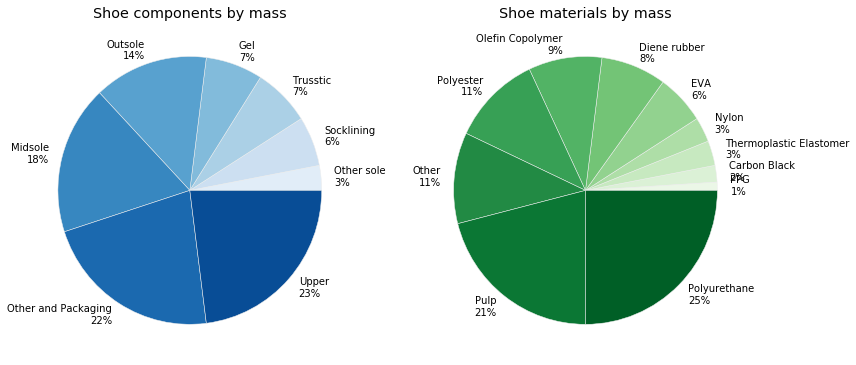

In [130]:
#components and materials
#what can we say about where the energy is used?

shoe_component_mass = {
    'Upper':.23,
    'Midsole':.18,
    'Outsole':.14,
    'Trusstic':.07,
    'Gel':.07,
    'Socklining':.06,
    'Other sole':.03,
    'Other and Packaging':.22
}
shoe_material_mass = {
    'Polyurethane':.25,
    'Pulp':.21,
    'Polyester':.11,
    'Olefin Copolymer':.09,
    'Diene rubber':.08,
    'EVA':.06,
    'Thermoplastic Elastomer':.03,
    'Nylon':.03,
    'Carbon Black':.02,
    'PPG':.01,
    'Other':.11
}
#compone
def make_colors(cmap_name,items):
    return [get_cmap(cmap_name)((i+1)/(len(items)+1)) for i in range(len(items))]
def make_pie(axes,dictionary,cmap_name, scale=100, unit='%',decimal=0):
    ordered_keys = sorted( dictionary.keys(), key=lambda k: dictionary[k] )
    ordered_values = sorted( dictionary.values() )
    scaled_values = [scale*v for v in ordered_values ]
    ordered_values = [v/sum(ordered_values) for v in ordered_values]
    return axes.pie(ordered_values, 
             labels=['%s\n%d%s'%(k,v,unit) if decimal==0 else '%s\n%.2f%s'%(k,v,unit) for k,v in zip(ordered_keys,scaled_values)],
            colors=make_colors(cmap_name,dictionary));

fig,axarr = subplots(1,2, figsize=(13,6))

make_pie(axarr[0],shoe_component_mass,'Blues')
axarr[0].set_title('Shoe components by mass')

make_pie(axarr[1],shoe_material_mass,'Greens')
axarr[1].set_title('Shoe materials by mass')

#export to json
for k,v in shoe_component_mass.iteritems():
    print "{\"Component\":\"%s\", \"Mass\":%f, \"Unit\":\"Percent\"},"%(k,v)

{"Process":"making midsole", "Units_Produced":3031249, "Electricity":{"Used":11636850,"Unit":"kWh"}, "Coal":{"Used":10158,"Unit":"ton"}},
{"Process":"injection molding", "Units_Produced":14856145, "Electricity":{"Used":1391566,"Unit":"kWh"}, "Coal":{"Used":0,"Unit":"ton"}},
{"Process":"assembly", "Units_Produced":3640833, "Electricity":{"Used":7393934,"Unit":"kWh"}, "Coal":{"Used":0,"Unit":"ton"}},
{"Process":"making cardboard box", "Units_Produced":9176255, "Electricity":{"Used":113702,"Unit":"kWh"}, "Coal":{"Used":0,"Unit":"ton"}},
{"Process":"making outsole", "Units_Produced":3239882, "Electricity":{"Used":2026545,"Unit":"kWh"}, "Coal":{"Used":2074,"Unit":"ton"}},


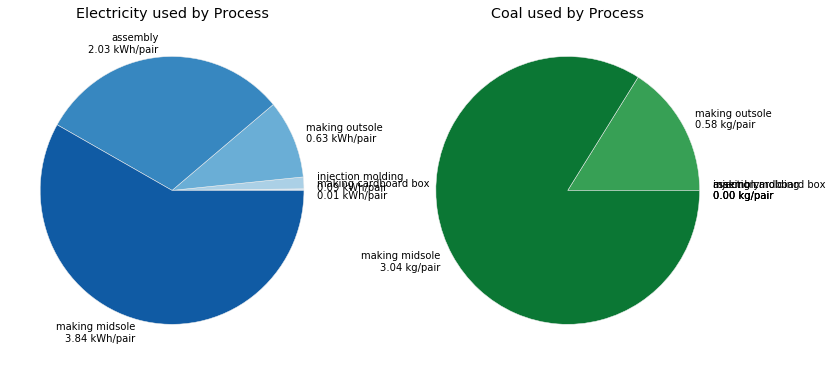

In [146]:
#let's see how we can do at attributing energy to the shoe components.  This is from Table 3 in the appendix to Cheah.
#this is all manufacturing energy

units_produced = {
    'assembly': 3640833, #pairs of shoes
    'making outsole': 12959528/4., #pairs of fores and heel
    'making midsole': 6062499/2., #pairs of soles
    'injection molding': 14856145, #parts
    'making cardboard box': 9176255, #boxes
}
electricity_used = {
    'assembly':  7393934, #kWh
    'making outsole': 2026545, #kWh
    'making midsole': 11636850, #kWh
    'injection molding': 1391566, #kWh
    'making cardboard box': 113702, #kWh   
}
coal_used = {
    'assembly':  0, #tons
    'making outsole': 2074, #tons
    'making midsole': 10158, #tons
    'injection molding': 0, #tons
    'making cardboard box': 0, #tons    
}
electricity_per_unit = {k:electricity_used[k]/units_produced[k] for k in units_produced.keys()}
coal_per_unit = {k:coal_used[k]/units_produced[k] for k in units_produced.keys()}
fig,axarr = subplots(1,2, figsize=(13,6))
make_pie(axarr[0],electricity_per_unit,'Blues',unit=' kWh/pair',scale=1.,decimal=1)
axarr[0].set_title('Electricity used by Process')
make_pie(axarr[1],coal_per_unit,'Greens',unit=' kg/pair',scale=907.1,decimal=1)
axarr[1].set_title('Coal used by Process')

#export to json
for k,v in units_produced.iteritems():
    print "{\"Process\":\"%s\", \"Units_Produced\":%d, \"Electricity\":{\"Used\":%d,\"Unit\":\"kWh\"}, \"Coal\":{\"Used\":%d,\"Unit\":\"ton\"}},"%(k,v,electricity_used[k],coal_used[k])
#for k,v in coal_used.iteritems():
#    print "{\"Process\":\"%s\", \"Energy_Used\":%d, \"Unit\":\"tons\"},"%(k,v)

In manufacturing phase, emissions known to arise primarily from fuel combustion and use of electricity to power equipment and machines.

The emissions attributed to scrap material are about a third of
the total materials processing emissions